In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
la = pd.read_csv('loan_approval.csv')
df = pd.DataFrame(la)
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

# Graph of Count vs Loan Status

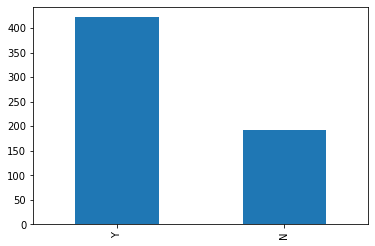

In [3]:
df['Loan_Status'].value_counts().plot(kind='bar')

# Graph of Count vs Property Area & Loan Status

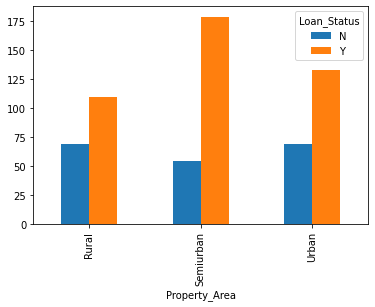

In [4]:
df.groupby(['Property_Area', 'Loan_Status']).size().unstack().plot(kind='bar')

# Graph of Count vs Education & Loan Status

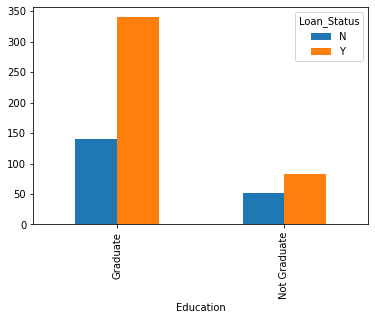

In [5]:
df.groupby(['Education', 'Loan_Status']).size().unstack().plot(kind='bar')

# Graph of Density vs Loan Amount

[Text(0.5, 0, 'Loan Amount'), Text(0.5, 1.0, 'For Not Graduated People')]

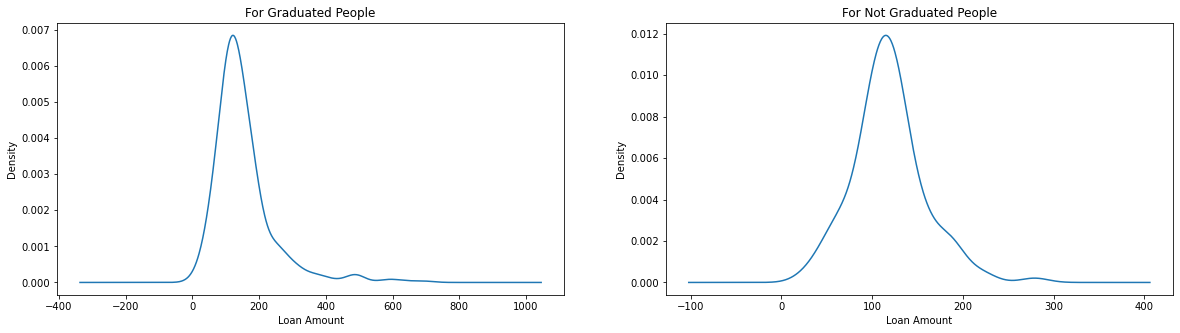

In [6]:
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,5))
df[df['Education'] == 'Graduate']['LoanAmount'].plot(kind='density', ax=ax_1)
df[df['Education'] == 'Not Graduate']['LoanAmount'].plot(kind='density', ax=ax_2)
ax_1.set(title='For Graduated People', xlabel='Loan Amount')
ax_2.set(title='For Not Graduated People', xlabel='Loan Amount')

# Scatter Plot of Loan Amount vs Income

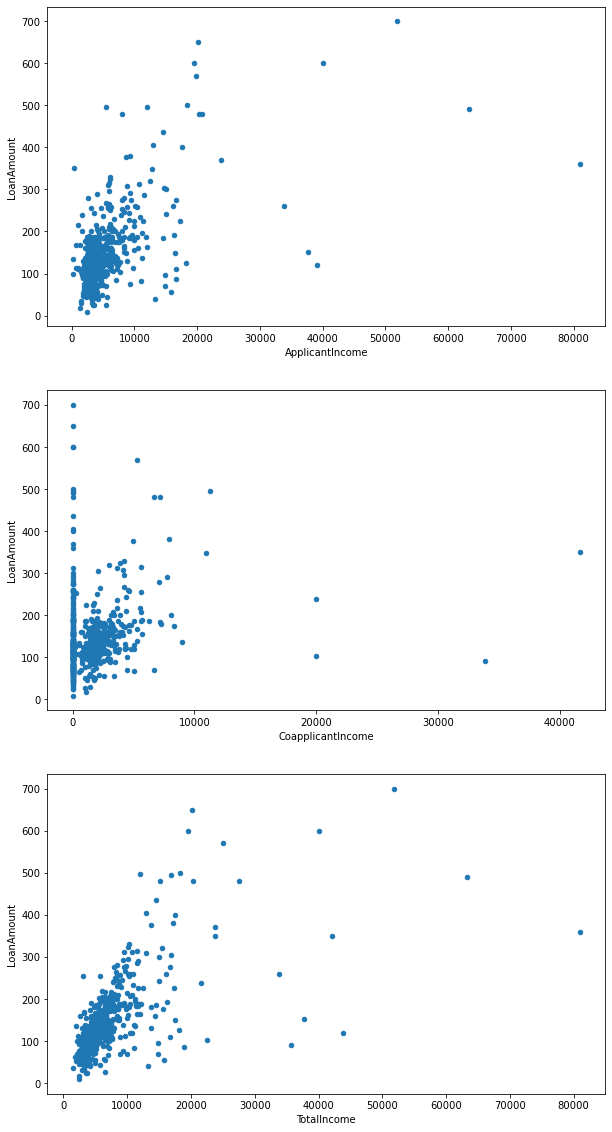

In [7]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(3,1, figsize=(10,20))
df.plot.scatter(x='ApplicantIncome', y='LoanAmount', ax=ax_1)
df.plot.scatter(x='CoapplicantIncome', y='LoanAmount', ax=ax_2)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.plot.scatter(x='TotalIncome', y='LoanAmount', ax=ax_3)
df.drop('TotalIncome', axis=1, inplace=True)